<a href="https://colab.research.google.com/github/sooyeon-go/recipe_rating/blob/master/preprocessing/20200207_hrson(%EC%A0%84%EC%B2%98%EB%A6%AC%20%EB%8B%A4%EC%8B%9C%ED%95%B4%EB%B3%B4%EB%8A%94%EC%A4%91).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 41kB/s 
     |████████████████████████████████| 450kB 58.0MB/s 
     |████████████████████████████████| 3.8MB 38.7MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goo

In [1]:
import tensorflow
tensorflow.__version__

'2.0.0'

In [2]:
import pandas as pd
import random
import re
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# review_rating data EDA

In [0]:
review_rating = pd.read_csv('/content/drive/My Drive/review_rating.csv')

In [5]:
review_rating = review_rating.astype({'rating': 'category'})
review_rating.head()

,review,rating
0,Great with a salad. Cooked on top of stove for...,4
1,This worked very well and is EASY. I used not...,4
2,very very sweet. after i waited the 2 days i b...,4
3,This recipe was OVERLY too sweet. I would sta...,2
4,Very good!,4


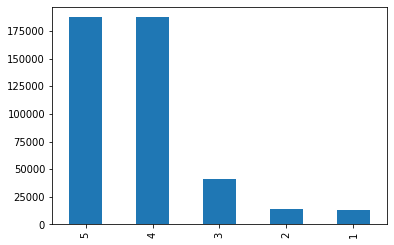

In [6]:
review_rating['rating'].value_counts().plot(kind='bar')

In [7]:
print(review_rating.groupby('rating').size().reset_index(name='count'))

  rating   count
0      1   12815
1      2   14122
2      3   40852
3      4  187333
4      5  187333


In [8]:
review_rating.isnull().values.any()

False

In [9]:
review_rating.drop_duplicates(inplace=True)
review_rating.duplicated().sum()

0

In [10]:
print(review_rating.groupby('rating').size().reset_index(name='count'))

  rating   count
0      1   12784
1      2   14113
2      3   40786
3      4  186723
4      5  186512


In [11]:
len(review_rating)

440918

In [12]:
review_rating['review'] = review_rating['review'].str.replace("[^a-zA-Z0-9 ]", '')
review_rating.head()

,review,rating
0,Great with a salad Cooked on top of stove for ...,4
1,This worked very well and is EASY I used not ...,4
2,very very sweet after i waited the 2 days i bo...,4
3,This recipe was OVERLY too sweet I would star...,2
4,Very good,4


In [13]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
from nltk.corpus import stopwords  
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [0]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

sentences = []
stop_words = set(stopwords.words('english')) 

for i in review_rating['review']:
    sentence = word_tokenize(i)
    result = []
    
    for word in sentence:
        word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄입니다.
        result.append(word)
    sentences.append(result)

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

sentences = []
stop_words = set(stopwords.words('english')) 

for i in review_rating['review']:
    sentence = word_tokenize(i)
    result = []
    
    for word in sentence:
        word = word.lower() # 모든 단어를 소문자화하여 단어의 개수를 줄입니다.
        if word not in stop_words:
            if len(word) > 2:
                result.append(word)
    sentences.append(result)

In [16]:
print(sentences[0])

['great', 'with', 'a', 'salad', 'cooked', 'on', 'top', 'of', 'stove', 'for', '15', 'minutesadded', 'a', 'shake', 'of', 'cayenne', 'and', 'a', 'pinch', 'of', 'salt', 'used', 'low', 'fat', 'sour', 'cream', 'thanks']


In [0]:
# max_words = 35000
# tokenizer = Tokenizer(num_words=max_words) # 상위 35,000개의 단어만 보존
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
review_data = tokenizer.texts_to_sequences(sentences)

In [18]:
print(review_data[0])

[29, 13, 4, 172, 131, 25, 157, 9, 852, 8, 455, 41826, 4, 1882, 9, 564, 3, 4, 932, 9, 136, 19, 308, 275, 301, 101, 27]


리뷰의 최대 길이 : 1181
리뷰의 평균 길이 : 53.20290167332701


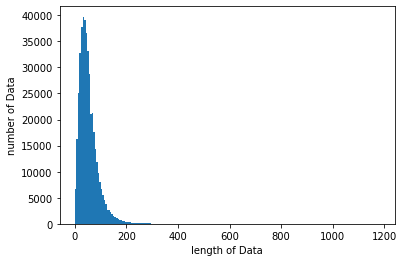

In [19]:
print('리뷰의 최대 길이 :',max(len(l) for l in review_data))
print('리뷰의 평균 길이 :',sum(map(len, review_data))/len(review_data))
plt.hist([len(s) for s in review_data], bins=200)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [0]:
max_len = 200 # 전체 데이터의 길이는 60으로 맞춘다.
review_data = pad_sequences(review_data, maxlen=max_len)

In [0]:
rating_data = np.array(review_rating['rating'])

# Fasttext

In [26]:
pip install gensim

In [30]:
from gensim.models import KeyedVectors

# Creating the model
eng_model = KeyedVectors.load_word2vec_format('/content/drive/My Drive/wiki.en.vec')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


OSError: ignored

In [0]:
# Getting the tokens 
words = []
for word in eng_model.vocab:
    words.append(word)

In [7]:
# Printing out number of tokens available
print("Number of Tokens: {}".format(len(words)))

Number of Tokens: 2519370


In [8]:
# Printing out the dimension of a word vector 
print("Dimension of a word vector: {}".format(
    len(eng_model[words[0]])
))

Dimension of a word vector: 300


# Print out the vector of a word 
print("Vector components of a word: {}".format(
    eng_model[words[0]]
))

In [9]:
print(words[0])

,


In [10]:
words[50]

'you'

In [0]:
embedding_dict = dict()
for word in words:
    embedding_dict[word] = eng_model[word]

In [31]:
vocab_size = len(tokenizer.word_index.items()) + 1
embedding_matrix = np.zeros((vocab_size, 300))
# 단어 집합 크기의 행과 100개의 열을 가지는 행렬 생성. 값은 전부 0으로 채워진다.
np.shape(embedding_matrix)

(164480, 300)

In [0]:
for word, i in tokenizer.word_index.items(): # 훈련 데이터의 단어 집합에서 단어를 1개씩 꺼내온다.
    temp = embedding_dict.get(word) # 단어(key) 해당되는 임베딩 벡터의 300개의 값(value)를 임시 변수에 저장
    if temp is not None:
        embedding_matrix[i] = temp # 임수 변수의 값을 단어와 맵핑되는 인덱스의 행에 삽입

In [34]:
embedding_matrix.shape

(164480, 300)

# 여기부터 시작하면된다

In [0]:
import pickle

with open('/content/drive/My Drive/review_data.pickle', 'rb') as f:
    review_data = pickle.load(f) # 단 한줄씩 읽어옴
with open('/content/drive/My Drive/rating_data.pickle', 'rb') as f:
    rating_data = pickle.load(f) # 단 한줄씩 읽어옴
with open('/content/drive/My Drive/embedding_matrix.pickle', 'rb') as f:
    embedding_matrix = pickle.load(f) # 단 한줄씩 읽어옴

In [0]:
rating_data = rating_data - 1

In [0]:
rating_data = to_categorical(rating_data)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(review_data, rating_data, test_size=0.1, random_state=0, stratify=rating_data)

In [64]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((396826, 60), (44092, 60), (396826, 5), (44092, 5))

# 1. LSTM으로 리뷰 점수 분석 (lr=0.001) (batchsize=256) (Dropout=0.5)

In [0]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [0]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
model = Sequential()
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(5, kernel_regularizer=regularizers.l2(0.001), activation='softmax'))

adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy', f1_m])

In [66]:
history = model.fit(x_train, y_train, epochs=30, batch_size=256, validation_data=(x_test, y_test))

Train on 396826 samples, validate on 44092 samples
Epoch 1/30
396826/396826 [==============================] - 139s 350us/sample - loss: 0.8798 - accuracy: 0.6219 - f1_m: 0.5871 - val_loss: 0.8104 - val_accuracy: 0.6470 - val_f1_m: 0.6264
Epoch 2/30
396826/396826 [==============================] - 130s 328us/sample - loss: 0.8012 - accuracy: 0.6547 - f1_m: 0.6349 - val_loss: 0.7792 - val_accuracy: 0.6598 - val_f1_m: 0.6416
Epoch 3/30
396826/396826 [==============================] - 130s 327us/sample - loss: 0.7792 - accuracy: 0.6640 - f1_m: 0.6467 - val_loss: 0.7620 - val_accuracy: 0.6671 - val_f1_m: 0.6529
Epoch 4/30
396826/396826 [==============================] - 130s 328us/sample - loss: 0.7650 - accuracy: 0.6691 - f1_m: 0.6539 - val_loss: 0.7558 - val_accuracy: 0.6702 - val_f1_m: 0.6598
Epoch 5/30
396826/396826 [==============================] - 130s 327us/sample - loss: 0.7548 - accuracy: 0.6738 - f1_m: 0.6597 - val_loss: 0.7548 - val_accuracy: 0.6700 - val_f1_m: 0.6582
Epoch 6/3

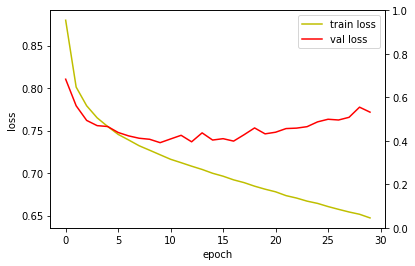

In [67]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

plt.show()

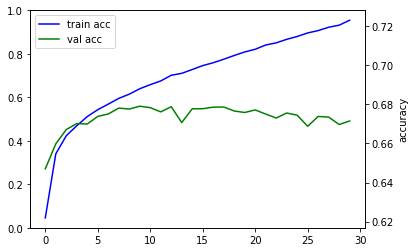

In [68]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

# 1. LSTM으로 리뷰 점수 분석 (lr=0.001) (batchsize=256) (Dropout=0.5)

In [0]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [0]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [0]:
model = Sequential()
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy', f1_m])

In [0]:
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

Train on 396826 samples, validate on 44092 samples
Epoch 1/10
396826/396826 [==============================] - 132s 332us/sample - loss: 0.8776 - accuracy: 0.6209 - f1_m: 0.5866 - val_loss: 0.8019 - val_accuracy: 0.6493 - val_f1_m: 0.6348
Epoch 2/10
396826/396826 [==============================] - 130s 329us/sample - loss: 0.7934 - accuracy: 0.6552 - f1_m: 0.6368 - val_loss: 0.7771 - val_accuracy: 0.6575 - val_f1_m: 0.6449
Epoch 3/10
396826/396826 [==============================] - 130s 329us/sample - loss: 0.7729 - accuracy: 0.6638 - f1_m: 0.6482 - val_loss: 0.7557 - val_accuracy: 0.6674 - val_f1_m: 0.6539
Epoch 4/10
396826/396826 [==============================] - 131s 331us/sample - loss: 0.7592 - accuracy: 0.6686 - f1_m: 0.6539 - val_loss: 0.7504 - val_accuracy: 0.6717 - val_f1_m: 0.6582
Epoch 5/10
396826/396826 [==============================] - 131s 331us/sample - loss: 0.7484 - accuracy: 0.6740 - f1_m: 0.6601 - val_loss: 0.7464 - val_accuracy: 0.6730 - val_f1_m: 0.6606
Epoch 6/1

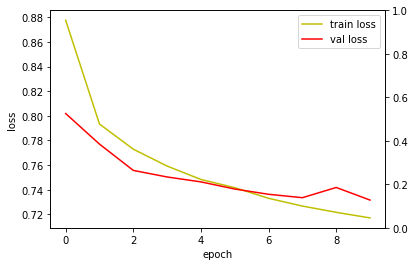

In [0]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

plt.show()

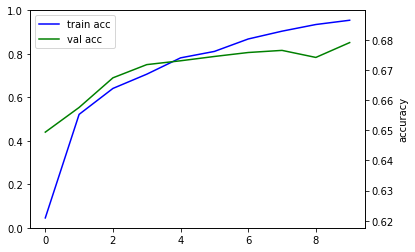

In [0]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()